In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('train1.csv' ,usecols = ['Pclass' , 'Sex', 'SibSp' , 'Parch' , 'Embarked' , 'Survived'])
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


In [8]:
ct = pd.crosstab(df['Sex'] , df['Survived'] , margins = True)
ct

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [10]:
from scipy.stats import chi2_contingency

In [11]:
chi2_contingency(ct)

Chi2ContingencyResult(statistic=263.05057407065567, pvalue=1.0036732821369117e-55, dof=4, expected_freq=array([[193.47474747, 120.52525253, 314.        ],
       [355.52525253, 221.47474747, 577.        ],
       [549.        , 342.        , 891.        ]]))

In [25]:
score = []

for features in df.columns[:-1]:
    ct = pd.crosstab(df['Survived'] , df[features])
    
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

In [26]:
score

[7.352052198553542e-195,
 4.549251711298793e-23,
 1.1973570627755645e-58,
 1.5585810465902116e-06,
 9.703526421039997e-05]

<Axes: >

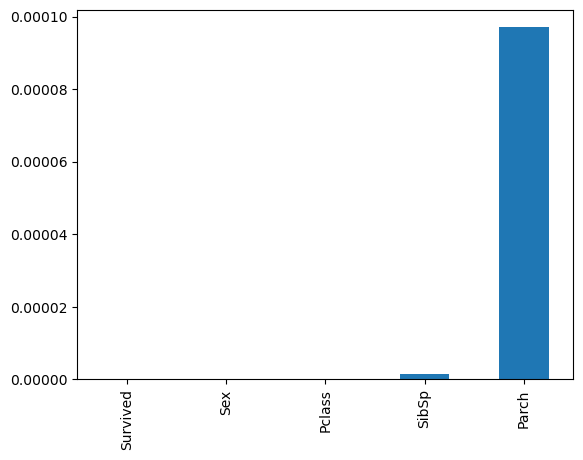

In [27]:
pd.Series(score, index=df.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

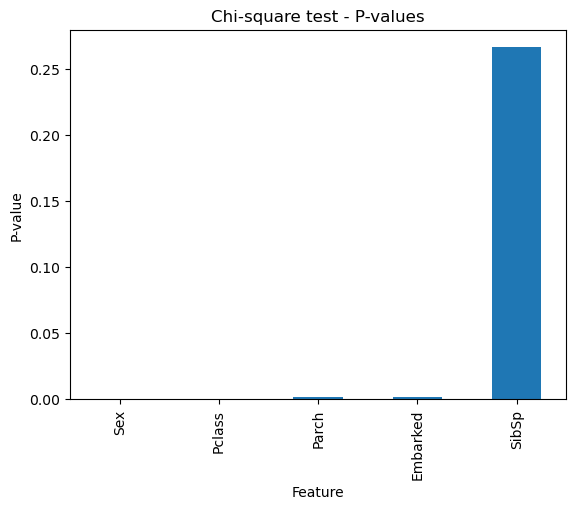

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# assuming titanic is your DataFrame and 'Survived' is the target column

# Encode categorical variables
le = LabelEncoder()
titanic_encoded = df.apply(le.fit_transform)

X = titanic_encoded.drop('Survived', axis=1)
y = titanic_encoded['Survived']

# Calculate chi-squared stats
chi_scores = chi2(X, y)

# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()